In [94]:
import os 
from scipy.signal import argrelmin, argrelmax
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data')
PLOTS = os.path.join(DIR, '../Plots')
U = 2  # V

def read(T):
    data1 = pd.read_csv(os.path.join(DATA, str(T)+".csv"), comment='#')[::100].astype(float)
    data2 = pd.read_csv(os.path.join(DATA, 'aufg1_2.csv'), comment='#')
    data1['U_B'] += float(data2[data2['T[C]'] == T]['U1[V]'])
    return data1
    
def plot(T, start):
    data = read(T)[start:]
    maxes = argrelmax(np.array(data['U_A']), order=2)[0]
    plt.plot(data['U_B'], data['U_A'])
    plt.scatter(data.iloc[maxes]['U_B'], data.iloc[maxes]['U_A'], label='Maxima')
    plt.xlabel('$U_B$[V]')
    plt.ylabel('$U_A$[V]')
    plt.savefig(os.path.join(PLOTS, str(T)+".png"), dpi=200)
    
def U_th(T, start):
    data = read(T)[start:]
    maxes = argrelmax(np.array(data['U_A']), order=2)[0]
    dU = np.mean(np.diff(data.iloc[maxes]['U_B']))
    U_A = float(data.iloc[maxes[0]]['U_A'])
    U_B = float(data.iloc[maxes[0]]['U_B'])
    return (dU - U_B , dU)

def main(T, start):
    plot(T, start)
    print("U_th = {:.3f}, dU = {:.3f} V".format(*U_th(T, start)))

U_th = -2.691, dU = 4.952 V


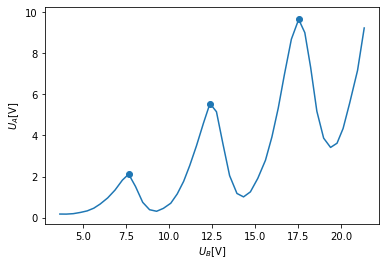

In [95]:
main(120, 10)

U_th = -2.773, dU = 4.933 V


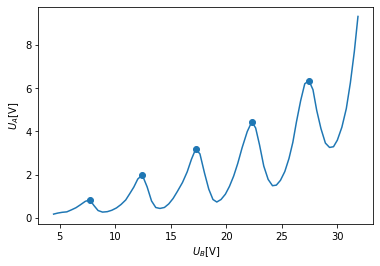

In [96]:
main(140, 0)

U_th = -2.929, dU = 4.852 V


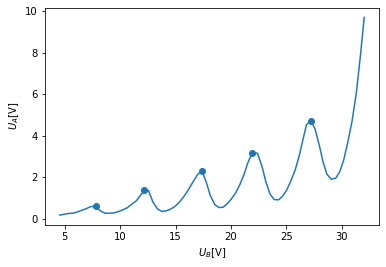

In [97]:
main(150, 0)

U_th = -2.588, dU = 4.902 V


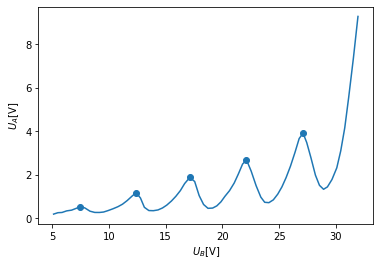

In [98]:
main(158, 1)

U_th = -3.784, dU = 3.888 V


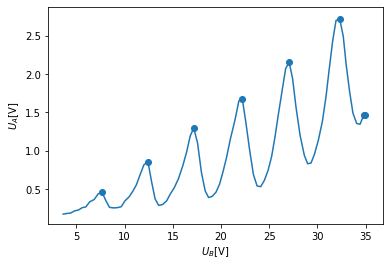

In [99]:
main(168, 4)